# Project

- Data Exploration
- Data Splitting (Train and Test dataset)
- Machine Learning
- AUC Scores
- Logistic Regression
- Decision Tree
- Cross-Validation

### Working Team:
### Kodjovi Egoh
### Plinio Tuta
### Takayedza Mashoko


The project was given by Professor: Karan Singh, PHD Computer Science

# Part A: Predicting Survivors on the Titantic


In this problem, you will build a model to predict whether or not individual passengers on
the Titanic survive the shipwreck. The data is contained in the file titanic.csv. There are
891 observations, each corresponding to a passenger. There are 9 variables in the dataset,
which are described below.

PassengerId :A numerical ID assigned to each passenger

Name: Name of passenger

Survived: Whether or not the passenger survived (1 if survived, 0 if not)

Pclass: Ticket class (1: first, 2: second, 3: third)

Sex: Sex of passenger (male, female)

SibSp:Number of passenger’s siblings and spouses aboard the Titanic

ParCh: Number of passenger’s parents and children aboard the Titanic

Fare: Ticket fare

Embarked: Port of embarkation (C:Cherbourg, Q:Queenstown, S:Southampton)

## A.1 Import the Library

Using the features Pclass, Sex, SibSp, ParCh, Fare, and Embarked, construct a unregularized
logistic regression model to predict the probability that a passenger on the Titanic
survived the shipwreck. You should use the entire dataset to train the model. Report your
model’s intercept term.

In [ ]:
# Import Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Import Dataset

In [ ]:
#Import dataset
df = pd.read_csv('titanic.csv')

# Display first few rows of the dataset
df.head()

,PassengerId,Name,Survived,Pclass,Sex,SibSp,ParCh,Fare,Embarked
0,1,"Braund, Mr. Owen Harris",0,3,male,1,0,7.2500,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,1,0,71.2833,C
2,3,"Heikkinen, Miss. Laina",1,3,female,0,0,7.9250,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,1,0,53.1000,S
4,5,"Allen, Mr. William Henry",0,3,male,0,0,8.0500,S


## Data Exploration

In [ ]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   ParCh        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [ ]:
# Summary Statistics
df.describe()

,PassengerId,Survived,Pclass,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


## Data Pre-processing

In [ ]:
# We have two categorial features that need to be one-hot encoded
df = pd.read_csv('titanic.csv')
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   ParCh        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(1), int64(5), object(1), uint8(3)
memory usage: 51.5+ KB


In [ ]:
# Create the usual X and y arrays
y = df['Survived']


x = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)
x.head()

,Pclass,SibSp,ParCh,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,1,0,7.2500,1,0,1
1,1,1,0,71.2833,0,0,0
2,3,0,0,7.9250,0,0,1
3,1,1,0,53.1000,0,0,1
4,3,0,0,8.0500,1,0,1


#### Here we are using the entire dataset to train the model

In [ ]:
import warnings

lr = LogisticRegression(penalty='none', max_iter=2000)
lr.fit(x, y)

warnings.simplefilter(action='ignore', category=FutureWarning)

# Get the intercept of the trained model
intercept = lr.intercept_

print("Intercept:", intercept)

Intercept: [3.50574389]


## A.2
Explain, as precisely as possible, how your model predicts that a passenger’s survival probability
is impacted by each of the following:

(a) The passenger’s sex

(b) The passenger’s ticket fare

(c) The passenger’s number of parents and children aboard

In [ ]:
Coefficients = lr.coef_

dict(zip(lr.feature_names_in_, lr.coef_[0]))

{'Pclass': -0.8396165257987247,
 'SibSp': -0.23399353049925042,
 'ParCh': -0.07455631255284922,
 'Fare': 0.002472772861591962,
 'Sex_male': -2.7333937426994535,
 'Embarked_Q': -0.20887289999953598,
 'Embarked_S': -0.4688151019565292}

### How the Model predicts that a passenger's survival probability is impacted by each of the following:

### a) The passenger's sex
#### Coefficient = -2.7333937426994535

#### We estimate that there is a negative statistical association between the male sex and the probability of survival. We estimate that a unit increase in being a male is associated with a multiplicative decrease in the odds of survival equal to exp (-2.73339) = 0.064998327, all else being equal.
#### In other words, we estimate that a unit increase in the male sex predictor is associated with a 93.5% decrease in the odds of survival, all else being equal.
#### Note that since the sex_male predictor is the binary indicator of a category of a categorical variable, exp(-2.73339) = 0.064998 is the estimated multiplicative difference in the odds of survival for that category relative to the baseline category of that categorical variable, all else being equal


### b) The passenger's ticket fare
Coefficient = 0.002472772861591962

####We estimate that there is a positive statistical association between the passenger’s ticket fare and the likelihood of survival. We estimate that a unit increase in the passenger’s ticket fare is associated with a multiplicative increase in the odds of survival = 1 equal to exp (0.00247277286) = 1.002475833, all else being equal. In other words, we estimate that a unit increase in the passenger’s ticket fare is associated with a 0.25% increase in the odds of survival = 1, all else being equal.


### c) The passenger's number of parents and children aboard
####Coefficient = -0.07455631255284922

####We estimate that there is a negative statistical association between the passenger's number of parents and children aboard and the probability of survival. We estimate that a unit increase in passenger's number of parents and children aboard is associated with a multiplicative decrease in the odds of survival equal to exp (-0.07455631255284922) = 0.928155206, all else being equal.
####In other words, we estimate that a unit increase in the passenger's number of parents and children aboard r is associated with a 7.18% decrease in the odds of survival, all else being equal.






## A.3

Consider a passenger that:

• Is female

• Has a first class ticket, having paid $62.50

• Has a spouse, no siblings, no parents, and two children aboard

• Embarked from Queenstown

For this passenger, what survival probability does your model predict? If computed by hand, show the steps of your calculation.



In [ ]:
#Learn some par of the code from chatGPT
# Intercept and coefficients
intercept = 3.0668585
coefficients = {
    'Pclass': -0.7512108151231993,
    'SibSp': -0.15253726921610786,
    'ParCh': -0.14001329496963139,
    'Fare': 0.003626786917975186,
    'Sex_male': -2.604503648399252,
    'Embarked_Q': -0.018309229211414927,
    'Embarked_S': -0.39799818748761906
}

# Sample passenger data
sample_passenger = {
    'Pclass': 1,  # first class ticket
    'SibSp': 1,  # passenger has a spouse
    'ParCh': 2,  # two children
    'Fare': 62.50,
    'Sex_male': 0,  # female
    'Embarked_Q': 1,  # embarked from Queenstown
    'Embarked_S': 0  # not embarked from Southampton
}

# Compute logit
logit = intercept
for feature, coef in coefficients.items():
    logit += coef * sample_passenger[feature]

# Convert log-odds into probability using logistic function
probability_survival = 1 / (1 + 2.71828**(-logit))

print("Probability of Survival for the Sample Passenger:", probability_survival)


Probability of Survival for the Sample Passenger: 0.8900691252920753


####This agrees with the predictions of individual features considered. Female passengers are predicted to have a 93.5% chance of survival all else being equal. The number of parents and children predicts a 7.18% decrease in the probability of survival while the fare has a 0.25% decrease.

# A.4

By treating ParCh as a numerical feature, we have been implicitly assuming that a passenger’s
survival probability should be strictly increasing or strictly decreasing in the number of that
passenger’s parents and children aboard. Instead, we may want to capture a more complex
relationship. Construct another unregularized logistic regression model, this time with ParCh
treated as categorical (so you should one-hot encode it). Then answer the following:

(a) Report all coefficients for the set of features corresponding to ParCh.

(b) Does your new model predict that survival probability is strictly increasing, strictly
decreasing, or neither in ParCh?

(c) How many classes/categories does ParCh contain? How many samples are in each class?

(d) In light of your answer to (c), comment on how confident we should be in drawing
conclusions from your answer to (A.2.C).

In [ ]:
# One-hot encode the ParCh feature
df = pd.read_csv('titanic.csv')
df = pd.get_dummies(df, columns = ['ParCh','Sex','Embarked'], drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   ParCh_1      891 non-null    uint8  
 7   ParCh_2      891 non-null    uint8  
 8   ParCh_3      891 non-null    uint8  
 9   ParCh_4      891 non-null    uint8  
 10  ParCh_5      891 non-null    uint8  
 11  ParCh_6      891 non-null    uint8  
 12  Sex_male     891 non-null    uint8  
 13  Embarked_Q   891 non-null    uint8  
 14  Embarked_S   891 non-null    uint8  
dtypes: float64(1), int64(4), object(1), uint8(9)
memory usage: 49.7+ KB


### a)

In [ ]:
# One-hot encode the ParCh feature

df = pd.read_csv('titanic.csv')
df = pd.get_dummies(df, columns = ['ParCh','Sex','Embarked'], drop_first=True)

# Define features and target variable
y = df['Survived']
x = df.drop(['Survived', 'PassengerId', 'Name'], axis=1)

# Train a logistic regression model
lr_parch_categorical = LogisticRegression(penalty=None, max_iter=1000)
lr_parch_categorical.fit(x, y)

# Get coefficients corresponding to ParCh features
coefficients_parch = dict(zip(x.columns, lr_parch_categorical.coef_[0]))

# Learn this Part from chatgpt
parch_coefficients = {key: value for key, value in coefficients_parch.items() if 'ParCh' in key}
print("Coefficients for ParCh features:")
print(parch_coefficients)


Coefficients for ParCh features:
{'ParCh_1': 0.6692933275073061, 'ParCh_2': 0.3119814512362208, 'ParCh_3': 0.15436989675427243, 'ParCh_4': -8.47183089674144, 'ParCh_5': -1.554084943445841, 'ParCh_6': -5.5237991344617505}


#### b) If some coefficients are positive and some are negative, then the relationship between survival probability and ParCh is not strictly increasing or decreasing. That is exactly the situation we have here and for that reason the relationship between survival probability and ParCh is not strictly increasing or decreasing.

### c)

In [ ]:
# We learn this from chatGPT
# Extract ParCh-related columns
parch_columns = [col for col in df.columns if 'ParCh' in col]

# Count the number of unique values and their occurrences in each ParCh-related column
for col in parch_columns:
    parch_counts = df[col].value_counts()
    num_classes_parch = len(parch_counts)
    print(f"ParCh column {col} has {num_classes_parch} classes/categories.")
    print("Number of samples in each class/category:")
    print(parch_counts)
    print()



ParCh column ParCh_1 has 2 classes/categories.
Number of samples in each class/category:
0    773
1    118
Name: ParCh_1, dtype: int64

ParCh column ParCh_2 has 2 classes/categories.
Number of samples in each class/category:
0    811
1     80
Name: ParCh_2, dtype: int64

ParCh column ParCh_3 has 2 classes/categories.
Number of samples in each class/category:
0    886
1      5
Name: ParCh_3, dtype: int64

ParCh column ParCh_4 has 2 classes/categories.
Number of samples in each class/category:
0    887
1      4
Name: ParCh_4, dtype: int64

ParCh column ParCh_5 has 2 classes/categories.
Number of samples in each class/category:
0    886
1      5
Name: ParCh_5, dtype: int64

ParCh column ParCh_6 has 2 classes/categories.
Number of samples in each class/category:
0    890
1      1
Name: ParCh_6, dtype: int64



### d)	Given the varied nature of the ParCh categories, it is not easy to confidently assert that the survival rate will increase or decrease. A closer look at A.2c above, having only one or 2 ParCh has much better chances than more than 2. Overall the effect of the number of Parents or children has little effect in the predictability of survival chances.

## Part B: Framingham Heart Study

Coronary heart disease (CHD) is the leading cause of death worldwide. In the late 1940s,
the U.S. government took steps to tackle heart disease. As part of this effort, it decided to
track a large cohort of initially-healthy people over time. The town of Framingham, MA was
selected as the site for the study. The study started in 1948, comprising 5,209 participants.
Participants were given a questionnaire and a medical exam every two years. Data was also
collected on the participants’ physical and behavioral characteristics. Over the years, the
study has expanded to include multiple generations and many factors—including genetic
information. This dataset is now known as the Framingham Heart Study.
The data is contained in the file framingham.csv. There are 3,658 observations, each corresponding
to a study participant. There are 16 variables in the dataset, which are described in
the table below. You will aim to predict TenYearCHD—that is, whether a patient experiences
CHD within 10 years of his/her first examination.

Male: Gender of patient (1 if male, 0 if female)

Age: Age (in years) at first examination

Education: Education level

CurrentSmoker: 1 if patient is a current smoker, 0 otherwise

CigsPerDay: Number of cigarettes per day

BPMeds: 1 if patient is on blood pressure medication at time of first examination,
0 otherwise

PrevalentStroke: 1 if patient previously had a stroke, 0 otherwise

PrevalentHyp: 1 if patient is currently hypertensive, 0 otherwise

Diabetes: 1 if patient currently has diabetes, 0 otherwise

TotChol: Total cholesterol (mg/dL)

SysBP: Systolic blood pressure

DiaBP: Diastolic blood pressure

BMI: Body Mass Index: weight (kg)/height (m)2

HeartRate: Heart rate (beats/minute)

Glucose: Blood glucose level (mg/dL)

TenYearCHD: 1 if patient has experienced coronary heart disease within 10 years of
first examination, 0 otherwise

# Import Library

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
import numpy as np

### Import Dataset

In [ ]:
#Import dataset
df = pd.read_csv('framingham.csv')

# Display first few rows of the dataset
df.head()

,Male,Age,Education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,College,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,High school/GED,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,Some high school,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,Some college/vocational school,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,Some college/vocational school,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


### Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Male             3658 non-null   int64  
 1   Age              3658 non-null   int64  
 2   Education        3658 non-null   object 
 3   CurrentSmoker    3658 non-null   int64  
 4   CigsPerDay       3658 non-null   int64  
 5   BPMeds           3658 non-null   int64  
 6   PrevalentStroke  3658 non-null   int64  
 7   PrevalentHyp     3658 non-null   int64  
 8   Diabetes         3658 non-null   int64  
 9   TotChol          3658 non-null   int64  
 10  SysBP            3658 non-null   float64
 11  DiaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  HeartRate        3658 non-null   int64  
 14  Glucose          3658 non-null   int64  
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(3), int64(12), object(1)
memory usage: 457.4+ KB


#### The variable Education is a categorial variable and needs to be one-hot encoded

In [ ]:
# Summary Statics
df.describe()

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Data Pre-processing
#### We have one categorial feature "Education" that needs to be one-hot encoded

In [ ]:
df = pd.get_dummies(df, columns=['Education'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Male                                      3658 non-null   int64  
 1   Age                                       3658 non-null   int64  
 2   CurrentSmoker                             3658 non-null   int64  
 3   CigsPerDay                                3658 non-null   int64  
 4   BPMeds                                    3658 non-null   int64  
 5   PrevalentStroke                           3658 non-null   int64  
 6   PrevalentHyp                              3658 non-null   int64  
 7   Diabetes                                  3658 non-null   int64  
 8   TotChol                                   3658 non-null   int64  
 9   SysBP                                     3658 non-null   float64
 10  DiaBP                               

In [ ]:
df.describe()

,Male,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD,Education_High school/GED,Education_Some college/vocational school,Education_Some high school
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269,0.300984,0.166211,0.417168
std,0.496886,8.562029,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331,0.458749,0.372321,0.493159
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000


### Split data into a training and test set according to 70/30 stratified split

In [ ]:
from sklearn.model_selection import train_test_split
# Read in the data and pre-process
df = pd.read_csv('framingham.csv')
df = pd.get_dummies(df, drop_first=True)

X = df.drop(['TenYearCHD'], axis=1)
y = df['TenYearCHD']


# Split randomly in test and train data such that 70% of the data is in train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify = y, random_state=2023)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Male                                      3658 non-null   int64  
 1   Age                                       3658 non-null   int64  
 2   CurrentSmoker                             3658 non-null   int64  
 3   CigsPerDay                                3658 non-null   int64  
 4   BPMeds                                    3658 non-null   int64  
 5   PrevalentStroke                           3658 non-null   int64  
 6   PrevalentHyp                              3658 non-null   int64  
 7   Diabetes                                  3658 non-null   int64  
 8   TotChol                                   3658 non-null   int64  
 9   SysBP                                     3658 non-null   float64
 10  DiaBP                               

### B.1

Use each of the following algorithms to train a classifier. If the algorithm requires tuning
a parameter, use 5-fold cross validation with AUC scoring. For each algorithm, report the
out-of-sample AUC.

(a) Unregularized Logistic Regression: increase max iter upon non-convergence

(b) Logistic Regression with L1-regularization

(c) Logistic Regression with L2-regularization

(d) Decision Tree: tune over reasonable ranges of max depth, min samples split

Hint: For parts (b) and (c), the LogisticRegressionCV() function may be helpful. Make
sure to import it the same way you import LogisticRegression. A sample usage would be
the following:
LogisticRegressionCV(penalty=‘l1’, Cs=[1,10,100], cv=5, solver=‘liblinear’,
random state=2023, scoring=’roc auc’)
This says to employ an L1 penalty, to try the tuning parameters 1,10, and 100, to use 5-fold
cross-validation with AUC scoring, and to solve with a solver called “liblinear” (just take
this last part for granted). Take a reasonable range of Cs.

#### a)

In [ ]:
# Train a logistic regression model
clf = LogisticRegression(penalty=None, max_iter=1200)
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

auc_test = roc_auc_score(y_test, y_pred_test)
print("Out-of-sample AUC:", auc_test)

Out-of-sample AUC: 0.769046225486728


#### b)

In [ ]:
clf_l1 = LogisticRegressionCV(penalty='l1', Cs=[1, 10, 100], cv=5, solver='liblinear', random_state=2023, scoring='roc_auc')
clf_l1.fit(X_train, y_train)
y_pred_l1 = clf_l1.predict_proba(X_test)[:, 1]
auc_l1 = roc_auc_score(y_test, y_pred_l1)
print("(b) Out-of-sample AUC (Logistic Regression with L1-regularization):", auc_l1)


(b) Out-of-sample AUC (Logistic Regression with L1-regularization): 0.7691427027791892


### c)

In [ ]:
clf_l2 = LogisticRegressionCV(penalty='l2', Cs=[1, 10, 100], cv=5, solver='liblinear', random_state=2023, scoring='roc_auc')
clf_l2.fit(X_train, y_train)
y_pred_l2 = clf_l2.predict_proba(X_test)[:, 1]
auc_l2 = roc_auc_score(y_test, y_pred_l2)
print("(c) Out-of-sample AUC (Logistic Regression with L2-regularization):", auc_l2)


(c) Out-of-sample AUC (Logistic Regression with L2-regularization): 0.769123407320697


### d)

In [ ]:

param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
dt = DecisionTreeClassifier(random_state=2023)
clf_dt = GridSearchCV(dt, param_grid, cv=5, scoring='roc_auc')
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict_proba(X_test)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_dt)
print("(d) Out-of-sample AUC (Decision Tree):", auc_dt)



(d) Out-of-sample AUC (Decision Tree): 0.7015185525833403


#### The scores are giving AUC of around 0.76 and 0.70 on the decision tree. An AUC of 0.76 suggests that the model has good discriminatory power but might have some room for improvement. It indicates that the model is decent at distinguishing between positive and negative instances, but there may be some overlap between the two classes. Overall, a value of 0.76 indicates that the model is performing reasonably well, but there is still potential for enhancement in its predictive accuracy.

### B.2

Build a simple decision tree. By “simple” we mean a prediction should be made after at most
three queries. Otherwise, use default parameters wherever possible. Afterward, provide the
following for your classifier:

(a) A visual depiction of the tree

(b) Its out-of-sample AUC

(c) Its out-of-sample ROC plot

(d) The highest achievable True Positive Rate if we require a True Negative Rate of at least
60%.




#### a)

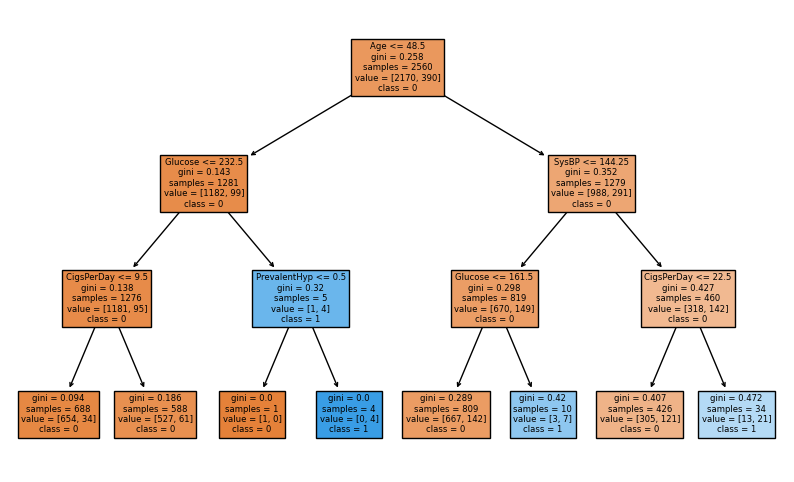

In [ ]:
# Train a decision tree classifier with limited depth
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=2023)
clf_tree.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()


####Patients who are currently hypertensive have a 25% (one in four) chances of CHD. Those with Glucose less than 161.5 mg/dL  are predicted to have 3 in seven chances of CHD while those who takes at least 22.5 cigarettes per day are predicted to have a higher chance of 13/21 chance of CHD

#### b)

In [ ]:
# Predict probabilities for the test set
y_pred_tree = clf_tree.predict_proba(X_test)[:, 1]

# Compute the out-of-sample AUC
auc_tree = roc_auc_score(y_test, y_pred_tree)
print("The Out-of-sample AUC (Decision Tree) is:", auc_tree)


The Out-of-sample AUC (Decision Tree) is: 0.7015185525833403


### c)

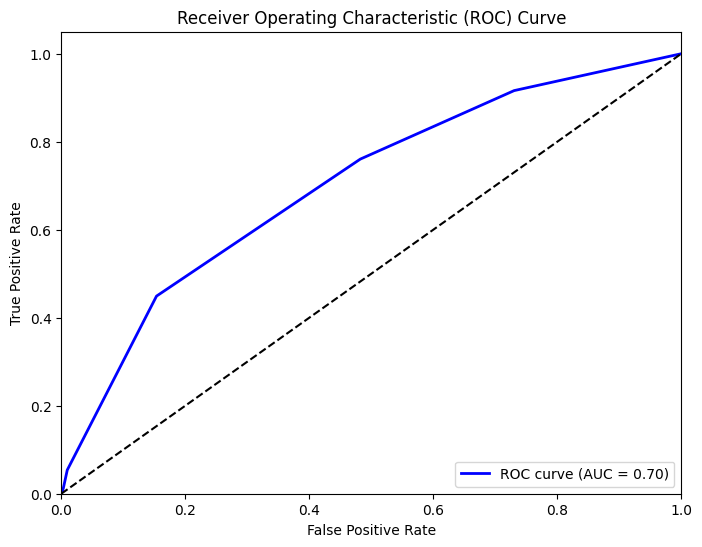

In [ ]:
# Compute ROC curve
# We Learn some part of the code from chatGPT
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_tree)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_tree)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### d)

In [ ]:
from sklearn.metrics import roc_curve
# We learn this from chatGPT
# Assuming you have computed the ROC curve before this loop
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

highest_tpr_with_required_tnr = 0

for fpr_tree, tpr_tree in zip(fpr, tpr):
    tnr_tree = 1 - fpr_tree  # Calculate TNR

    if tnr_tree >= 0.60:
        highest_tpr_with_required_tnr = max(highest_tpr_with_required_tnr, tpr_tree)

print(f"Highest achievable TPR with TNR at least 60%: {highest_tpr_with_required_tnr}")


Highest achievable TPR with TNR at least 60%: 0.4491017964071856
